# Titanic - Kaggle Notebook

## Importing our libraries

In [59]:
import numpy as np
import pandas as pd
 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib 
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier


## Importing our datasets and splitting X and Y

In [60]:
data=pd.read_csv('../data/raw/train.csv')
data_test=pd.read_csv('../data/raw/test.csv')
data.columns = data.columns.str.replace(' ', '')
#Dropping the NaNs for Embarked
data=data.dropna(subset=["Embarked"])
X = data.drop('Survived', axis=1)
#X = train_data.append(test_data)
y=data.Survived
X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [61]:
#Here we can se the totals of NaNs
X.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [62]:
#Checking the types of data
dataTypeSeries = X.dtypes
dataTypeSeries

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Visualizing Data


### Bar charts for categorical data:
    1. PClass
    2. Sex
    3. SibSp
    4. Parch
    5. Embarked
    6. Cabin

In [63]:
def bar_chart(feature):
    survived=X[y==1][feature].value_counts()
    dead=X[y==0][feature].value_counts()
    df=pd.DataFrame([survived,dead])
    df.index=["Survived","Dead"]
    df.plot(kind="bar",stacked=True,figsize=(10,5))

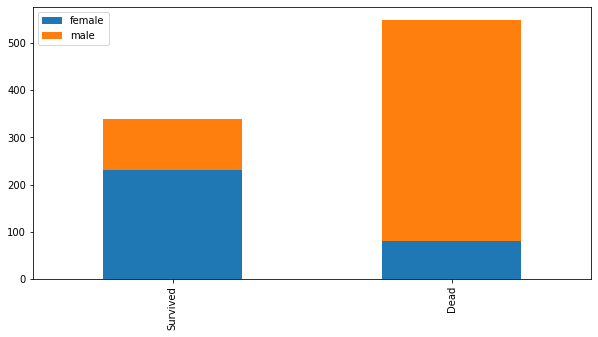

In [64]:
bar_chart("Sex")

>Women are more likely to survive than men

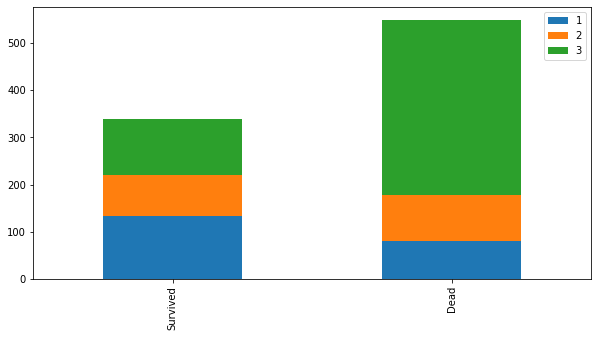

In [65]:
bar_chart("Pclass")

>Chart confirms survival based on pclass

## Data Preprocessing

In [66]:
#We can see that having PC in ticket does affect the rate of survival
people=[X.PassengerId.iloc[i] for i in range(len(X.Ticket)) if X.Ticket.iloc[i].find("PC")==0]
people
surv=[y[i-1] for i in people]
sum(surv)/len(surv)

0.65

>We can see that having **PC** in ticket does affect the rate of survival

### Taking care of NaNs

In [67]:
#Dropping NaNs for Age
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(X[['Age']])
X["Age"]=imr.transform(X[["Age"]])

In [68]:
#Changing object Sex to Numeric 
X.Sex=X['Sex'].map({'female': 1, 'male': 0})
X.Sex=X.Sex

In [69]:
dummy=pd.get_dummies(X["Embarked"])
X=pd.concat([X,dummy],axis=1)

for i in people:
    X.Cabin.iloc[i-1]=1
for i in range(len(X.Cabin)):
    if X.Cabin.iloc[i]!=1:
        X.Cabin.iloc[i]=0

In [70]:
#Dropping unnecesarry columns
drops=["Name","PassengerId","Embarked","Ticket","Cabin"]#,"Age"]
X=X.drop(drops,axis=1)


In [71]:
def norm(X):
    mean=np.mean(X)
    std=np.std(X)
    return (X-mean)/std
X.Age=norm(X.Age)

In [72]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,0,-5.896199e-01,1,0,7.2500,0,0,1
1,1,1,6.448480e-01,1,0,71.2833,1,0,0
2,3,1,-2.810029e-01,0,0,7.9250,0,0,1
3,1,1,4.133853e-01,1,0,53.1000,0,0,1
4,3,0,4.133853e-01,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,0,-2.038487e-01,0,0,13.0000,0,0,1
887,1,1,-8.210826e-01,0,0,30.0000,0,0,1
888,3,1,7.949101e-15,1,2,23.4500,0,0,1
889,1,0,-2.810029e-01,0,0,30.0000,1,0,0


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=34, 
                  
                                                    stratify=y)

In [74]:
model=RandomForestClassifier(n_estimators=40)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [75]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7640449438202247